# Project 2: quasielastic neutron scattering from a switchable dielectric

## Background: switchable dielectric materials

Dielectric materials are crucial parts of many electrical components, including capacitors and sensors. One atomic mechanism for dielectric behaviour is where molecules with a permanent dipole moment are free to rotate, so that they can line up with an external electric field. A simple example is liquid water. (There is a nice [animation](https://www.doitpoms.ac.uk/tlplib/dielectrics/polarisation_mechanisms.php) of how this occurs; select “orientational polarisation”. Alternatively, have a look at a [static image](http://hydrogen.physik.uni-wuppertal.de/hyperphysics/hyperphysics/hbase/electric/dielec.html) of the same situation.) 

However, for many practical purposes it is easier to use a solid than a liquid dielectric. The materials design challenge is then to invent a way in which molecules can be trapped in a crystal lattice while still being relatively free to rotate. In practice the molecule will rarely have complete rotational freedom; rather, there will be a small energy barrier to rotation. This energy barrier is an important property of the relevant material; **the first aim of this project is to determine this quantity based on experimental data.**

There has been particular recent interest in *switchable* dielectrics, which respond to external stimuli such as temperature or pressure by changing their dielectric constant. **The material in this project changes its dielectric behaviour at a certain temperature; the second aim is to determine what this temperature is.**

## The target material: potassium imidazolium hexacyanocobaltate(III)

We will be analysing [data that my research group collected](https://data.isis.stfc.ac.uk/doi/STUDY/103200945/) using the [OSIRIS spectrometer](https://www.isis.stfc.ac.uk/Pages/Osiris.aspx) at ISIS Neutron and Muon Source. The [target material](https://pubs.rsc.org/en/content/articlelanding/2015/cc/c4cc08693g) was potassium imidazolium hexacyanocobaltate(III), (C<sub>3</sub>N<sub>2</sub>H<sub>5</sub>)<sub>2</sub>KCo(CN)<sub>6</sub>. This material consists of potassium, cobalt, and cyanide ions connected into cubic cages that hold imidazolium ions. The [imidazolium ion](https://pubchem.ncbi.nlm.nih.gov/compound/imidazolium#section=3D-Conformer&fullscreen=true), C<sub>3</sub>N<sub>2</sub>H<sub>5</sub><sup>+</sup>, is planar and pentagonal, and has a permanent dipole moment. The dielectric behaviour in this material comes from the ion rotating in its plane. 

## Experimental technique: quasielastic neutron scattering

The technique we have chosen to probe molecular rotation, which is particularly sensitive to the motion of <sup>1</sup>H atoms, is *quasielastic neutron scattering*, or [QENS](https://core.ac.uk/download/pdf/85216068.pdf). This is a complex technique and you are not required to become experts in it for the purposes of this project! (But if you would like to know a bit more, the linked article or [this presentation from Oak Ridge National Laboratory in the USA](https://neutrons2.ornl.gov/nxs/2014/lectures/resources/herwig--quasielastic-neutron-scattering.pdf) are good places to start).

When a neutron interacts with a scattering material, its energy may change. The data sets given here are the neutron scattering intensity as a function of energy transfer $E = E_\mathrm{i} - E_\mathrm{f}$. (Here “i” means “initial” and “f” “final”.) 

### Analysis step 1: integrate over a suitable window
In theory, *elastic* scattering (which reflects the material’s atomic structure) occurs exactly at $E = 0$ while *quasielastic* scattering (which reflects molecular rotations) occurs slightly away from this point. However, in a real experiment the elastic scattering peak will not be infinitely sharp, but will have a finite width. For this reason, to determine the elastic component we need to integrate across a small window centred at zero:

$$ S_\text{elastic} \approx \int_{-L}^L S(E)\,\mathrm{d}E $$

There is no sharp, well-defined cutoff between elastic and quasielastic scattering, so we have to choose the limit $L$ empirically, based on what seems to give sensible results.

### Analysis step 2: fit as a function of temperature

As the temperature is raised, it becomes easier for molecules to overcome the energy barrier to rotation. So we expect more rotation, more quasielastic scattering, and (because the total amount of scattering is constant), *less elastic scattering* as the temperature rises.

Once we have determined the elastic component at each temperature, we will fit a model function to describe this fall in the elastic scattering as a function of temperature:

$$ S_\text{elastic}(T) = \frac{2A}{\pi}\tan^{-1}\left\{\frac{L}{\lambda_0}\exp\left(\frac{E}{k_\mathrm{B}T}\right)\right\} $$.

In this model, the most important parameter is $E$, which represents the energy barrier to the molecule rotating. To achieve the two aims above, we will fit this function to our data at low and high temperatures. The dielectric switching temperature is where the $E$ parameter changes; that is, the temperature at which the low-$T$ and high-$T$ curves intersect.

## Step 1: Integrate over a suitable window

We start as usual by importing `numpy` and `pyplot`, and by setting up to plot within the notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from pylab import loglog, xlabel, ylabel, title, legend, figure

### Importing data

Scattering intensity data are provided as text files. Open one in your favourite text editor to see that they are simply lists of numbers. The easiest way to import them directly into Python is by the `loadtxt` command from `numpy`:

In [2]:
data = np.loadtxt('data/data_130K.txt')

**Have a look at the `data` array, and check that it matches the data in the text file you loaded.** 

In [3]:
data

array([1.06204780e-02, 9.97039167e-03, 4.31713975e-02, 2.40203340e-02,
       2.16982670e-02, 1.53146044e-02, 5.38083684e-02, 2.62332790e-02,
       3.58910270e-02, 3.02729720e-02, 2.98762570e-02, 4.29421600e-02,
       4.02569170e-02, 2.88251756e-02, 3.27950951e-02, 5.63799290e-02,
       5.64931768e-02, 4.61685430e-02, 7.46815060e-03, 2.94805180e-02,
       1.43516127e-02, 4.25827290e-02, 3.88481330e-03, 4.68922850e-02,
       3.76668628e-02, 3.88698170e-02, 3.90498768e-02, 4.09087850e-02,
       3.63663106e-02, 2.22595256e-02, 4.93834710e-02, 1.78390243e-02,
       4.07235780e-02, 5.09052195e-02, 3.56910890e-02, 3.07425430e-02,
       1.77461827e-02, 5.44377715e-02, 3.52291030e-02, 4.47062532e-02,
       6.17387652e-02, 5.55497271e-02, 3.87262500e-02, 4.43960570e-02,
       7.09668806e-02, 5.61396069e-02, 4.57683480e-02, 2.96483900e-02,
       4.92537010e-02, 3.57033540e-02, 5.63661819e-02, 2.73750790e-02,
       5.15783995e-02, 4.55524605e-02, 4.87928721e-02, 3.03990299e-02,
      

The different components of `data` represent the scattering at different energies $E$. The corresponding $E$ values are as follows:

In [4]:
# energies in meV
E = np.linspace(-0.499, 0.499, 500)

As usual, the easiest way to get a sense of a particular data set is to plot it.

**Plot the scattered intensity as a function of $E$.**

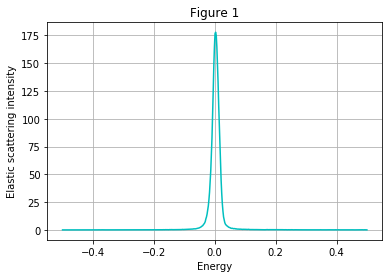

In [5]:
plt.plot(E,data,'c')
plt.title('Figure 1')
xlabel('Energy')
ylabel('Elastic scattering intensity')
plt.grid()

You should be able to see, as expected that most of the scattering occurs around $E \approx 0$ (which is why it is called *quasielastic* scattering: recall that *elastic* scattering involves exactly zero gain or loss of energy).

### Integrating the data

We want to integrate the elastic component of the data; that is, the data where $|E| < L$ for some limit $L$. Of course the specific value is somewhat arbitrary, but to start with we will define the scattering as elastic if it is below $L = 0.02\ \mathrm{meV}$. Check from your plot above that this appears reasonable.

There is a clever way to do this without trying to work out by hand exactly which column numbers in `data` satisfy this condition…

#### Interlude: indexing with boolean arrays

Try evaluating the cell below. What do you expect the result to be? Can you see why you get the result you do?

In [6]:
my_array = np.array([1., -2., -3., 4.])
my_index = np.array([True, False, True, False])

my_array[my_index]

array([ 1., -3.])

Can you change `my_index` (leaving `my_array` as it is) to instead select just the second element, `-2.`, of `my_array`?

In [7]:
my_index =np.array([False, True, False, False])

my_array[my_index]

array([-2.])

Suppose we want to select only the positive elements of `my_array`. Using this technique, we will be able to do this provided that we can make an `array`, the same shape as `my_array`, that is `True` exactly where `my_array > 0` and `False` elsewhere. 

We can do this using the property of `array`s that mathematical operations are performed individually on each component. Evaluate the two cells below. Can you explain the results?

In [8]:
my_array + 1 ##adding 1 to every element in the array

array([ 2., -1., -2.,  5.])

In [9]:
my_array >  0   ##checking each element in the array for positive integer

array([ True, False, False,  True])

Putting this together, we can select only the positive elements of `my_array` using the simple code below. Check that you understand how this works:

In [10]:
my_array[my_array > 0]

array([1., 4.])

#### Back to the integration problem

Returning to the project problem, we can select just the elastic scattering component of the data, those where $|E| < L$, using exactly the same technique:

In [11]:
L = 0.02
data[abs(E) < L]

array([ 27.2495  ,  33.92345 ,  43.007086,  53.41002 ,  67.697737,
        82.852323, 103.041588, 124.441432, 147.177095, 164.481793,
       176.670719, 177.9307  , 175.001205, 164.640594, 149.513752,
       132.791632, 112.238139,  95.535785,  77.004118,  59.81202 ])

Using either the `trapz` function from `scipy.integrate` or your own trapezoid method integration code, **integrate these data.** 

*Sanity check*: the answer should be about 4.25.

*Hint*: you have two options here. If you use your own code, or if you pass the `dx` argument to `trapz`, you will need to know the $E$-spacing in these data points: how could you calculate this? Alternatively, you could pass the relevant $E$ values themselves  to `trapz`, in which case you will need to select the parts of the `E` array with `abs(E) < 0.02` in the same way as we did for `data`.

In [12]:
from scipy.integrate import trapz
trapz(data[abs(E) < L],E[abs(E) < L]) 

4.2497798560000035

### Elastic scattering as a function of temperature

Using an appropriate loop, **repeat this calculation for every data set provided** (from 130 K to 250 K in 5 K steps). Hence **plot the elastic scattering as a function of temperature.**

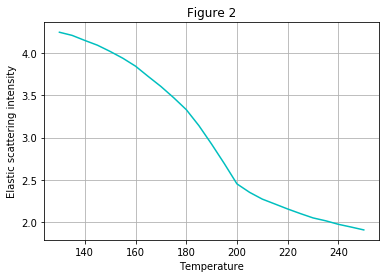

In [13]:
calculus= []
temperature= []

for i in range (130,255,5):
    d = np.loadtxt("data/data_"+str(i)+"K.txt")
    integration = trapz(d[abs(E) < L],E[abs(E) < L])
    calculus.append(integration)
    temperature.append(i)

plt.plot(temperature,calculus,'c') 
plt.title('Figure 2')
xlabel('Temperature')
ylabel('Elastic scattering intensity')
plt.grid()

## Step 2: fit as a function of temperature

Recall from the introduction above that the elastic scattering is approximately given by

$$ S_\text{elastic}(T) = \frac{2A}{\pi}\tan^{-1}\left\{\frac{L}{\lambda_0}\exp\left(\frac{E}{k_\mathrm{B}T}\right)\right\} $$.

This model has three parameters:

* $E$ is the energy barrier to the molecule rotating; 
* $\lambda_0$ is a measure of how fast the molecule would rotate in the high-temperature limit;
* $A$ is a scale factor.

In addition, we need to know $L$, the limit up to which we integrated above. 

$k_\mathrm{B}$ is as usual the Boltzmann constant. For convenience we can import this from the `scipy.constants` module. We also import the elementary (electron) charge $e$, for convenience converting between SI units of energy (joules) and electron volts:

In [14]:
from scipy.optimize import curve_fit
from scipy.constants import Boltzmann, elementary_charge

**Complete the following Python function to represent the model function above.**

(It is called `ews` for “elastic window scan”.)

In [15]:
L = 0.02
def ews(T, E, lam0, A):
    s_elastic=((2*A)/(np.pi))*(np.arctan((L/lam0)*np.exp(E/(Boltzmann*T))))
    return s_elastic

**By eye, determine a reasonable first guess for `E`, `lam0`, and `A` to fit the data at low $T$. Use the `ews` function to plot your model, with guessed parameters, on the same graph as the elastic window data from above. You should find that your model stops fitting well above a certain $T = T_0$, which corresponds to this material's dielectric transition. What is this transition temperature $T_0$, approximately? Can you find *different* parameters that work well at $T > T_0$?**

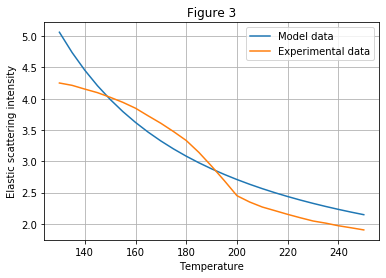

In [16]:
ews_data= []
temp=[]
##for A=4100 lam0= 70 fits well after 200k
for i in range(130,251,5):
    graph = ews(i,0.02*elementary_charge,60,4000)
    ews_data.append(graph)
    temp.append(i)

plt.plot(temp,ews_data,label="Model data") #graph from modelling equation
plt.plot(temperature,calculus,label="Experimental data")##graph from data provided   
xlabel('Temperature')
ylabel('Elastic scattering intensity')
plt.title("Figure 3")
plt.legend()
plt.grid()

**Use `curve_fit` to determine the best-fit parameters to the model in the high- and low-$T$ regions of the curve, starting with your guesses from above. Replot the figure to show your best-fit model.**

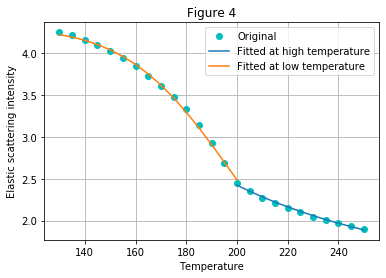

In [17]:
plt.plot(temperature,calculus,'oc',label="Original")  
guess= [0.02*elementary_charge,70,4100] 

High_T=[]
low_T=[]
elastic_high=[]
elastic_low=[]

for h in range(200, 255, 5):
    High_T.append(h)
    data1 = np.loadtxt("data/data_"+str(h)+"K.txt")
    integrate = trapz(data1[abs(E) < L],E[abs(E) < L])
    elastic_high.append(integrate)
    
for l in range(130, 205, 5):
    low_T.append(l)
    data2 = np.loadtxt("data/data_"+str(l)+"K.txt")
    calc = trapz(data2[abs(E) < L],E[abs(E) < L])
    elastic_low.append(calc)

high,covh=curve_fit(ews,High_T,elastic_high,p0=guess)
low, covl=curve_fit(ews,low_T,elastic_low,p0=guess)


fit_high=[]
fit_low=[]
    
for k in High_T:
    fit_high.append(ews(k,high[0],high[1],high[2]))
    
for j in low_T:
    fit_low.append(ews(j,low[0],low[1],low[2]))
    

plt.title('Figure 4')
plt.plot(High_T,fit_high,label="Fitted at high temperature")
plt.plot(low_T,fit_low, label= "Fitted at low temperature")
xlabel('Temperature')
ylabel('Elastic scattering intensity')
plt.legend()
plt.grid() 

**At what temperature does this material’s dielectric behaviour change? How does the barrier $E$ to molecular rotation (recall that this governs the dielectric response) change at this point?**

200K.As quasielastic scattering increases at higher temperature that means there is a small change in the energy barrier. The energy barrier peak shifts and E is not longer 0.

### Extension 

Remember that our choice of $L$, the integration limit, was somewhat arbitrary. How do your results depend on the specific value of $L$?

The value of L does not affect the temperature at which the target material changes its behaviour, it affects the shape of the graph. For L>~0.09meV the graph becomes quite steep so, it becomes harder to tell at which point the dielectric changes.

 # Report 

#### Introduction:
Many electrical components consist of dielectric materials such as capacitors. The molecules in dielectric materials have dipole moments which are free to rotate and when an external electric field is applied, the dipole moments line up. In practice, the molecules rarely have complete rotational freedom and there is an energy barrier to overcome so, the first step is to determine the energy from experimental data. Some dielectrics change its behaviour based on external stimuli, in this project, the material changes its property due to temperature hence, the next is step is to find the temperature at which it does so. The target material to be analysed is potassium imidazolium hexacyanocobaltate(III). The imidazolium ion, C3N2H5+, has a permanent dipole moment and the dielectric behaviour in this material arises from the ion rotating in its plane. [1] So, what is the point of researching switchable dielectric materials? Interdigitated electrostatic MEMS devices can convert mechanical energy (vibration) into electrical energy with potential application in wireless sensor networks which combined with switchable dielectric can be used for enhancing the power delivered by interdigitated MEMS electrostatic converters on a micro scale where using a battery is not an optimum solution due to their weight/volume and other such constraints. Wireless sensors are used in homeland security, military for surveillance operations and intelligence.[2]This is one example of its potential application in the electronics industry; it could also be used as a model in the fields of molecular ferroelectrics, molecular rotors and other systems where molecular interactions play an important role in determining the properties of the system.[3]

#### Method:
As mentioned above the two bits of information that we are interested in is the energy barrier quantity and the temperature at which the dielectric behaviour changes. To determine the energy barrier, I used the experimental data provided by the research group at ISIS Neutron and Muon Source. Quasi-elastic neutron scattering technique has been used to probe molecular rotation as it is particularly sensitive to the motion of H atoms. The data given to us is scattered intensity as a function of energy which I integrated over using the equation shown below and then plotted a graph of elastic scattered intensity against Energy along with another plot of  elastic scattered intensity against temperature ranging between 130k to 250k.
$$ S_\text{elastic} \approx \int_{-L}^L S(E)\,\mathrm{d}E $$
Elastic scattering occurs at E=0 and quasielastic scattering at energy slightly away from E=0. With increasing temperature there is more rotation in molecules therefore, more quasielastic scattering than elastic scattering takes place. This implies the graph at high temperature should fall which takes us to the next step of the analysis.Firstly,the model function was fitted to the experimental data across all the temperatures to scale it using reasonable guessed values for the scale factor,lam0 and E. Then the model function (shown below) was fitted to the experimental data at low and high temperatures and the point at which the two regions intersect is the temperature where the energy barrier (E) is overcome and dielectric behaviour changes.[1] 
$$ S_\text{elastic}(T) = \frac{2A}{\pi}\tan^{-1}\left\{\frac{L}{\lambda_0}\exp\left(\frac{E}{k_\mathrm{B}T}\right)\right\} $$

#### Results:
In figure 3, with the guessed parameters,$E$=3.2043532416e-2J,$\lambda_0$=60,$A$=4000, as I tried to fit the data at low temperature, the data stopped fitting well after 200K. The parameters that worked well for high temperatures, T> 200K, are $E$=3.2043532416e-21 J,$\lambda_0$=70,$A$=4100, but not for T<200k so, 200K is approximately the dielectric transition temperature.By using curve fit in the next bit of analysis I found the best fit parameters to be,$E$=3.2043532416e-21J,
$\lambda_0$=70, $A$=4100, which fit both high and low regions well (they were fitted separately in two regions) and intersected at 200K.

#### Conclusion:
In conclusion, it has been found that the target material changes its dielectric behaviour at 200 K where the Energy barrier is approximately 0.02*elementary charge= 3.2043532416e-21J. The value of Integration limit does not affect the temperature where the change occurs, however it becomes harder to distinguish the transittion point if L is approximately greater than 0.09meV. This means that the temperature at which the change in the dielectric material occurs is only dependent on its structure , once the required quantity of energy is provided to overcome the barrier.To put it simply, Energy provided greater than the required amount makes no difference to the transition point.


### References:
Project 2 Lab script [1]

https://ieeexplore.ieee.org/document/4497694 [2]

https://www.advancedsciencenews.com/switchable-dielectric-properties-organic-salt/ [3]